In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import xgboost as xgb

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
%matplotlib inline
rcParams['figure.figsize'] = 12, 10

from scipy.stats import randint
import operator
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# EXPLORATORY DATA ANALYSIS

In [2]:
data=pd.read_csv('DANE_PRZYGOTOWANE_80.csv',sep=';')
data

Year               Player Pos     G      MP   3PAr    FTr   ORB%  \
0      1980.0  Kareem Abdul-Jabbar   C  82.0  3143.0  0.001  0.344  0.072   
1      1980.0        Tom Abernethy  PF  67.0  1222.0  0.003  0.258  0.054   
2      1980.0          Alvan Adams   C  75.0  2168.0  0.002  0.270  0.082   
3      1980.0       Tiny Archibald  PG  80.0  2864.0  0.023  0.548  0.023   
4      1980.0        Dennis Awtrey   C  26.0   560.0  0.000  0.833  0.060   
...       ...                  ...  ..   ...     ...    ...    ...    ...   
15888  2021.0         Delon Wright  SG  63.0  1748.0  0.332  0.243  0.041   
15889  2021.0       Thaddeus Young  PF  68.0  1652.0  0.068  0.171  0.114   
15890  2021.0           Trae Young  PG  63.0  2125.0  0.357  0.491  0.020   
15891  2021.0          Cody Zeller   C  48.0  1005.0  0.086  0.367  0.126   
15892  2021.0          Ivica Zubac   C  72.0  1609.0  0.010  0.434  0.136   

        DRB%   TRB%  ...       DRB        TRB        AST       STL       BLK  \
0      0.222  0.154  ...  7.972001  10.148266   4.249443  0.927776  3.207127   
1      0.120  0.086  ...  3.800327   5.626841   2.563011  1.031097  0.353519   
2      0.224  0.154  ...  7.488930  10.112546   5.346863  1.793358  0.913284   
3      0.053  0.038  ...  1.734637   2.476257   8.434358  1.332402  0.125698   
4      0.169  0.115  ...  5.528571   7.392857   2.571429  0.771429  0.964286   
...      ...    ...  ...       ...        ...        ...       ...       ...   
15888  0.131  0.086  ...  4.151945   5.579176   5.708924  2.075973  0.648741   
15889  0.169  0.142  ...  5.630993   9.187409   6.371913  1.630024  0.889104   
15890  0.105  0.063  ...  3.522071   4.162447  10.032565  0.853835  0.213459   
15891  0.229  0.177  ...  7.565373  11.691940   3.094925  1.031642  0.687761   
15892  0.224  0.181  ...  7.410317  11.598757   2.094220  0.483282  1.449845   

            TOV        PF        PTS  height      weight  
0      3.401845  2.474069  23.297486  218.00  102.000000  
1      1.148936  3.476268  10.664484  201.00   99.000000  
2      3.619926  3.935424  18.564576  206.00   95.000000  
3      3.041899  2.740223  14.216480  185.00   68.000000  
4      1.735714  4.242857   5.528571  208.00  106.000000  
...         ...       ...        ...     ...         ...  
15888  1.686728  1.556979  13.234325  195.58   83.914588  
15889  2.963680  3.260048  17.930266  203.20  106.594207  
15890  4.375906  1.921129  27.002541  185.42   81.646627  
15891  1.891343  4.298507  16.162388  210.82  108.862169  
15892  1.772032  4.188440  14.498446  213.36  108.862169  

[15893 rows x 38 columns]

In [3]:
data.columns

Index(['Year', 'Player', 'Pos', 'G', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'height',
       'weight'],
      dtype='object')

In [4]:
data.Pos.value_counts()

PF    3308
PG    3211
SG    3189
SF    3103
C     3082
Name: Pos, dtype: int64

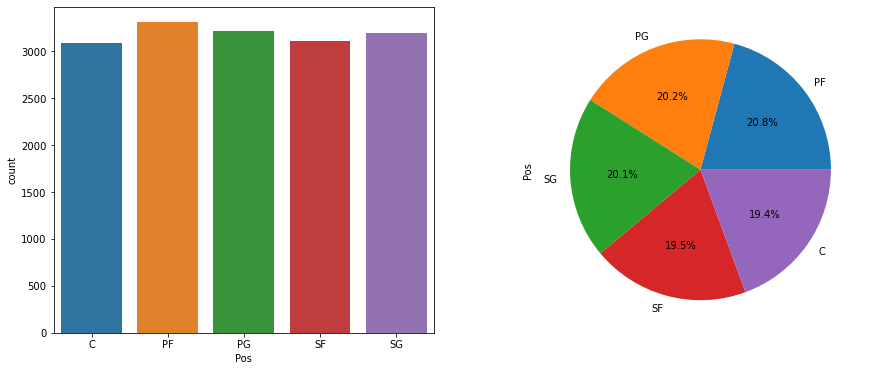

In [5]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='Pos', data=data, ax=ax[0])
_ = data['Pos'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

#Dataset is balanced

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


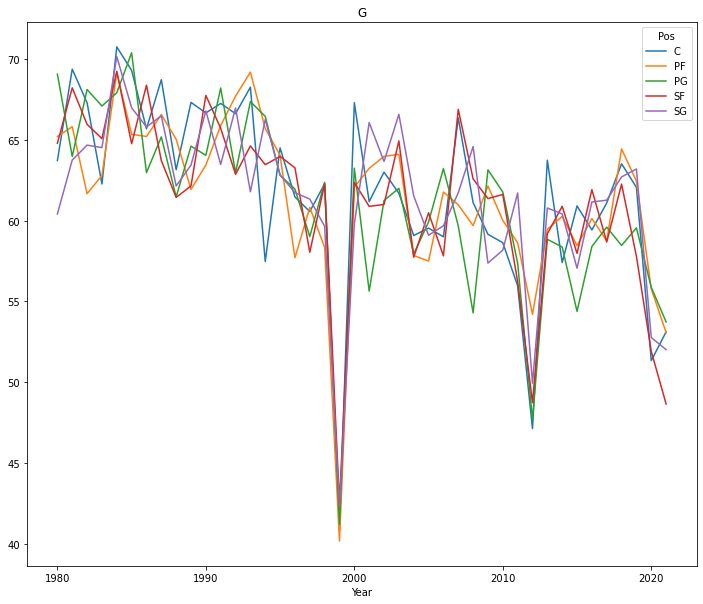

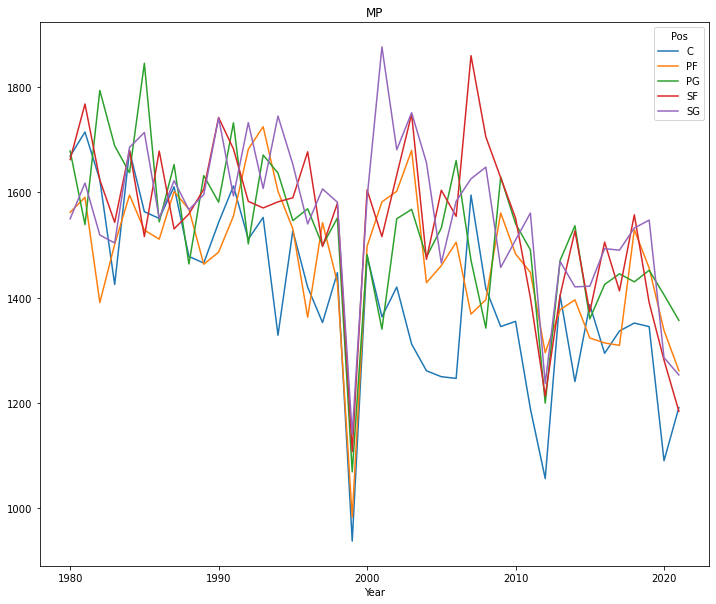

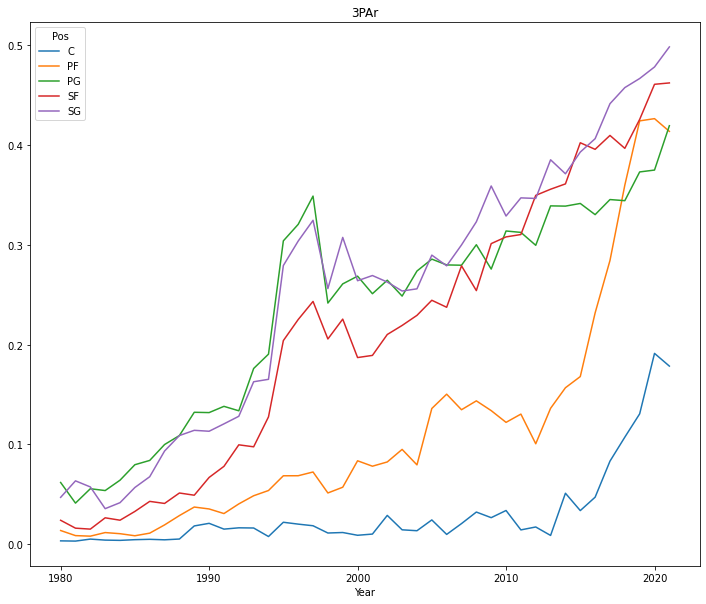

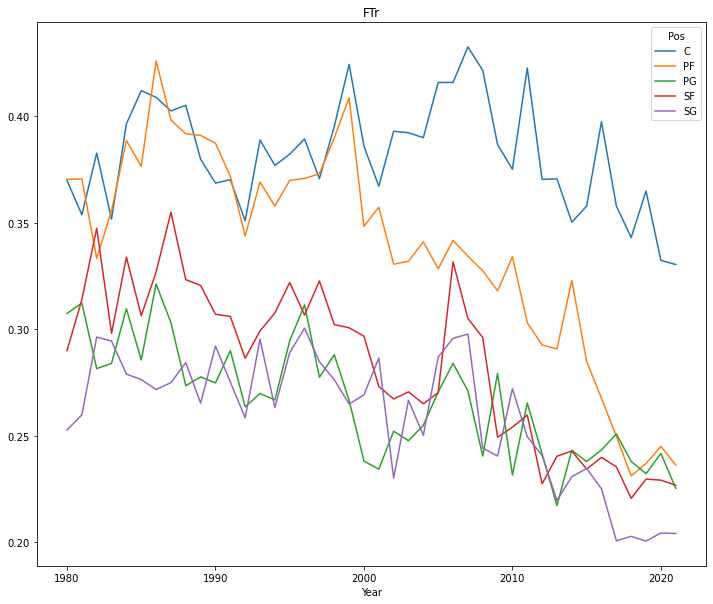

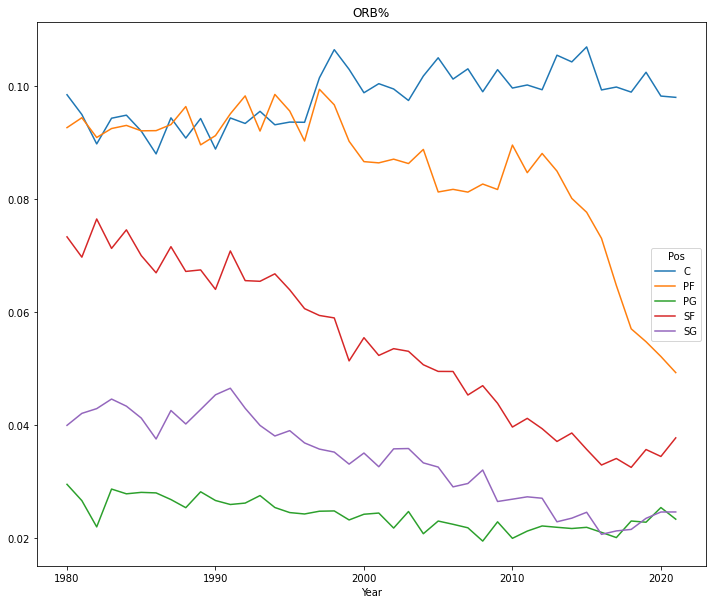

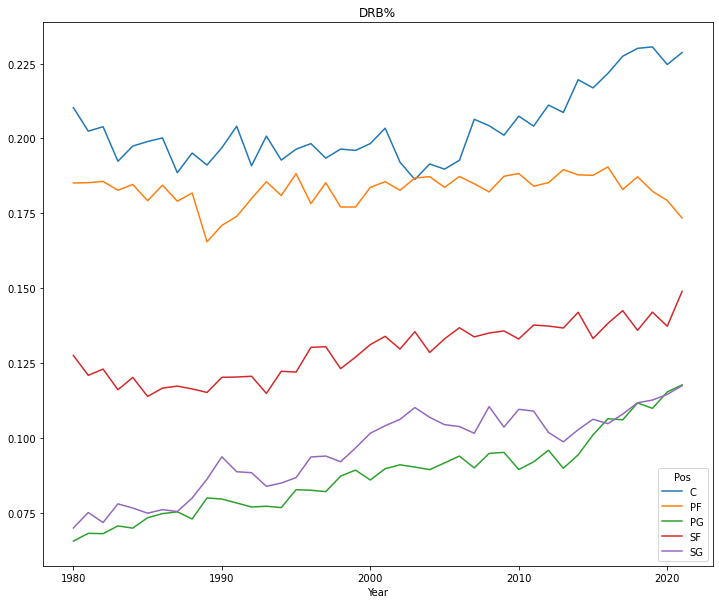

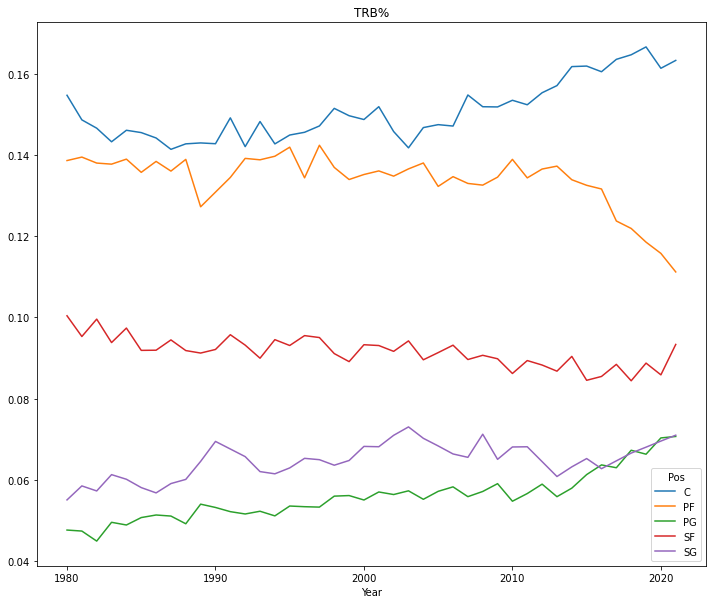

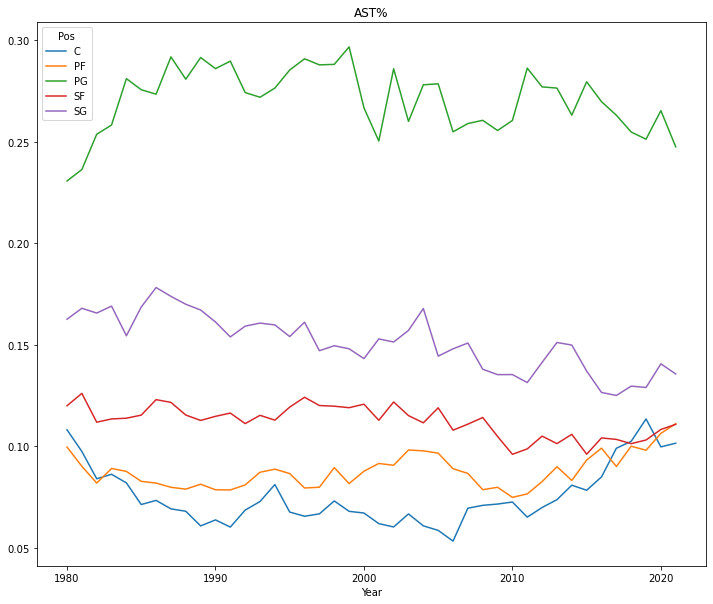

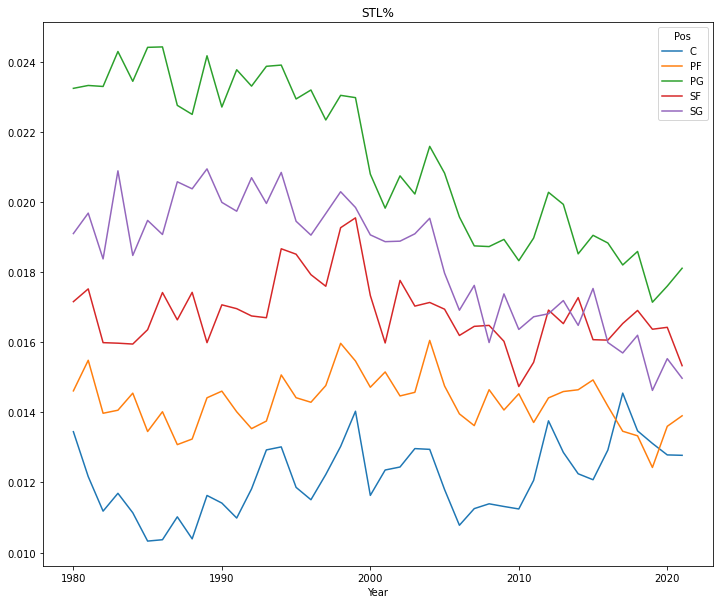

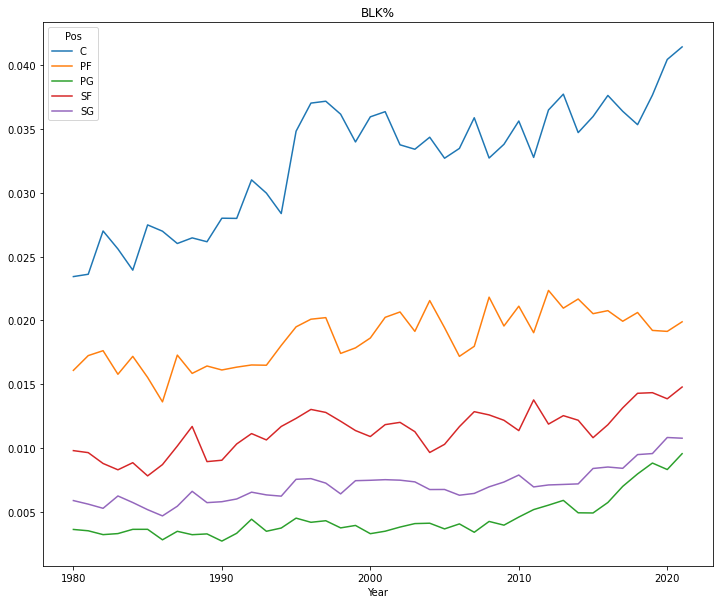

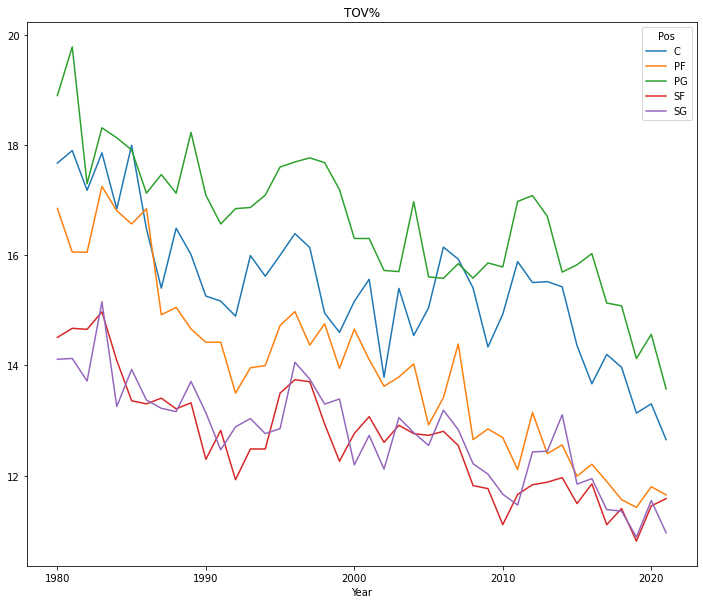

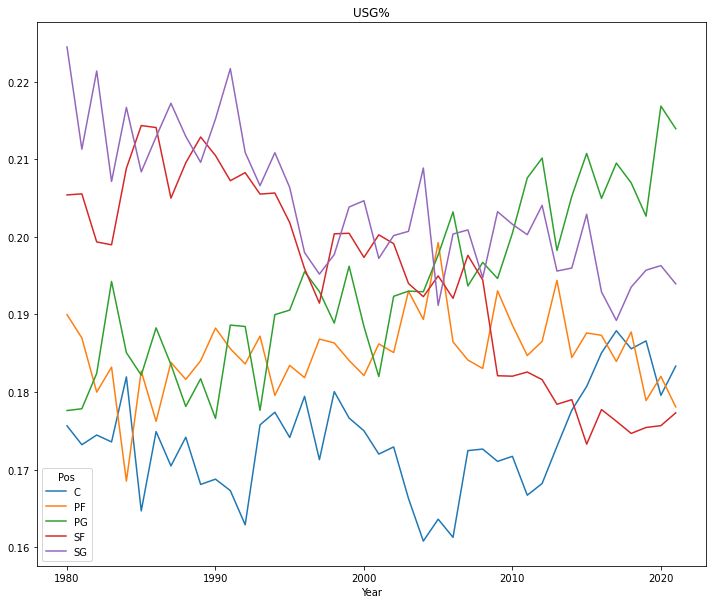

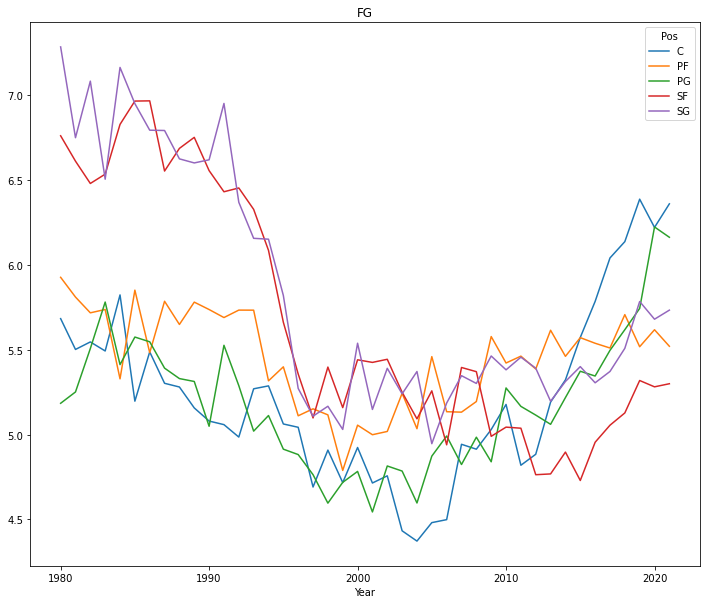

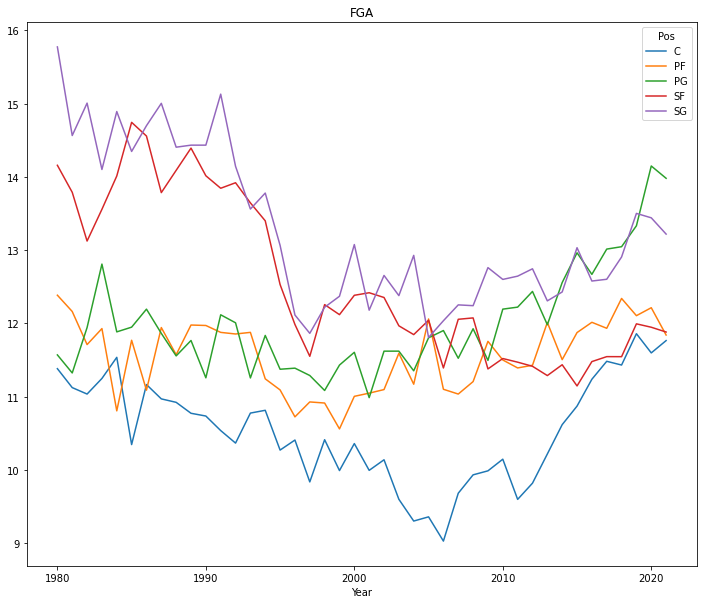

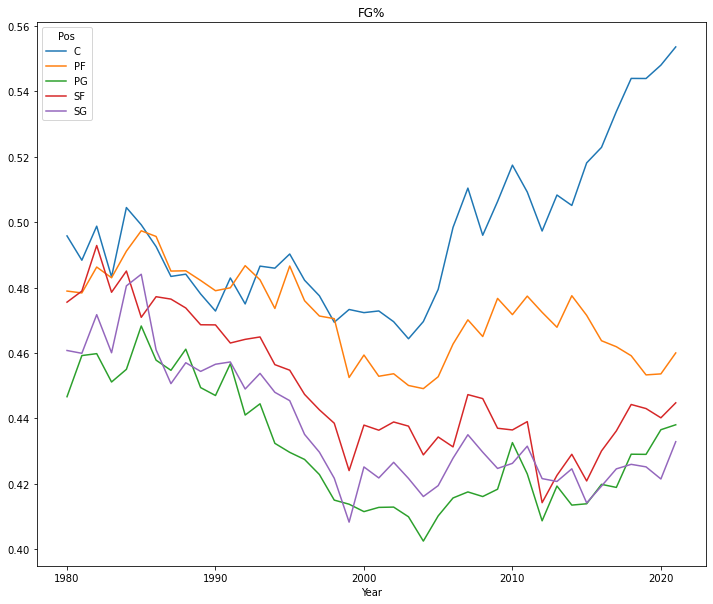

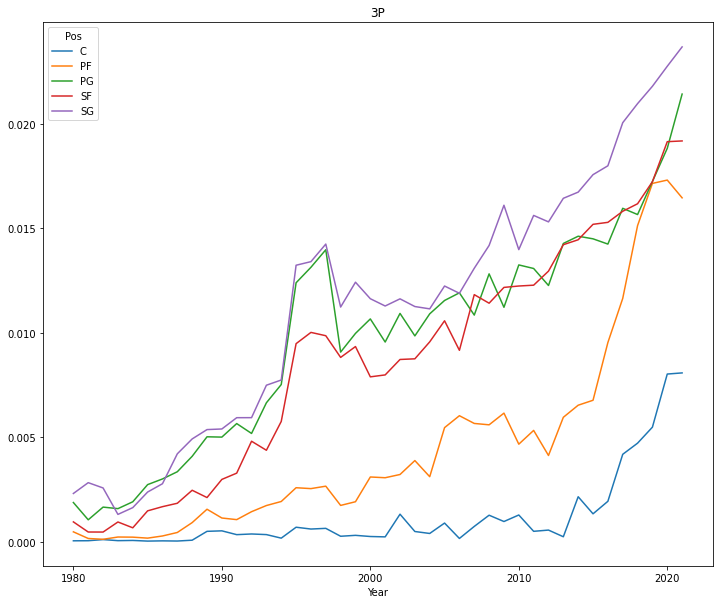

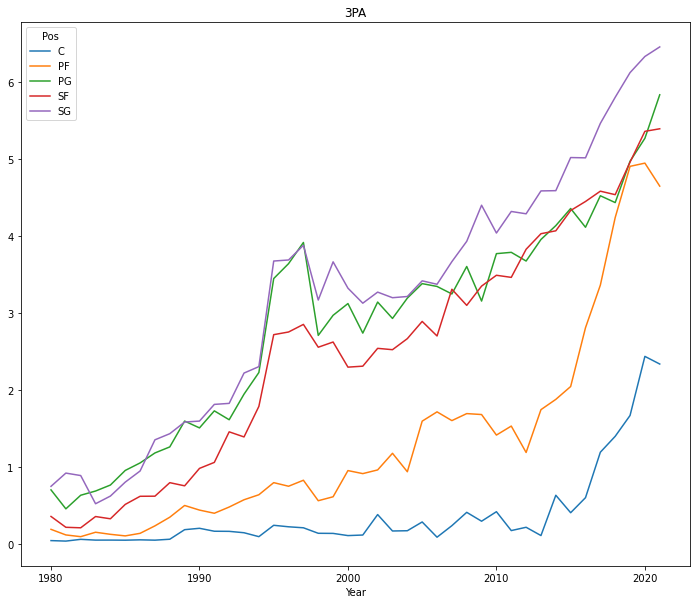

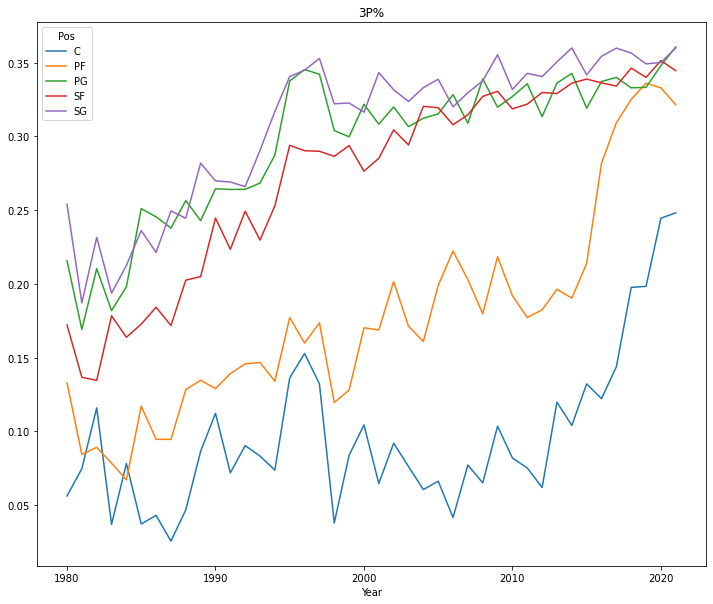

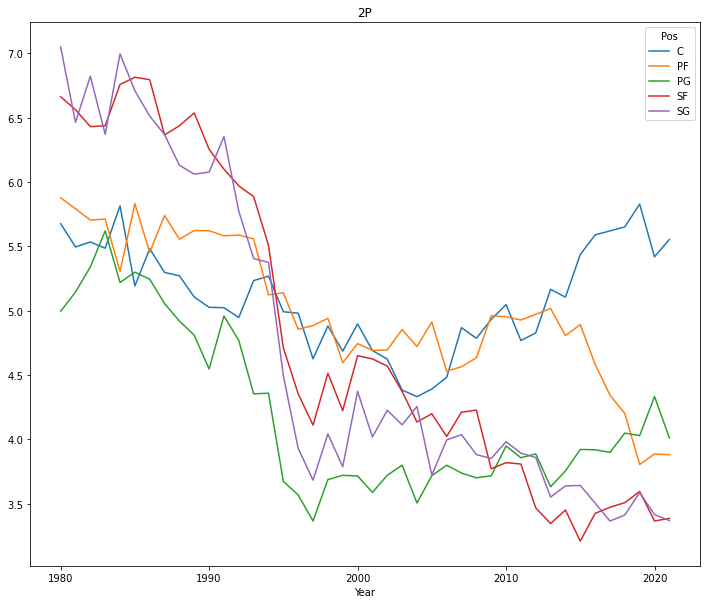

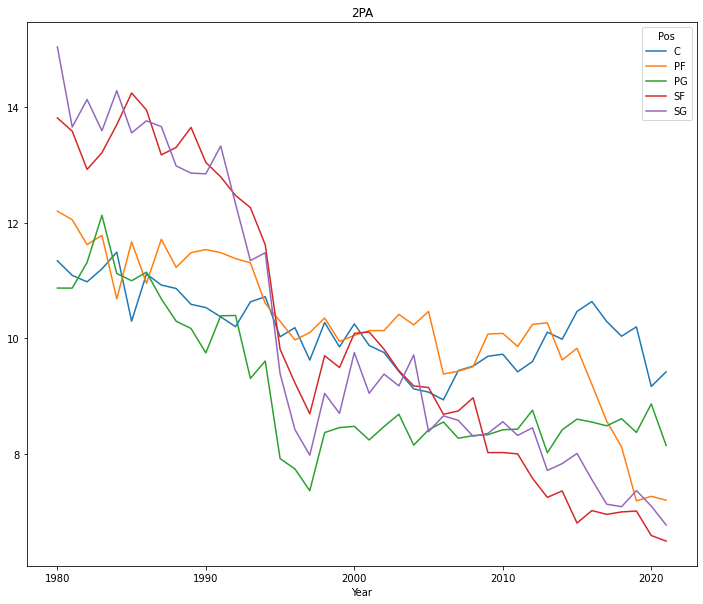

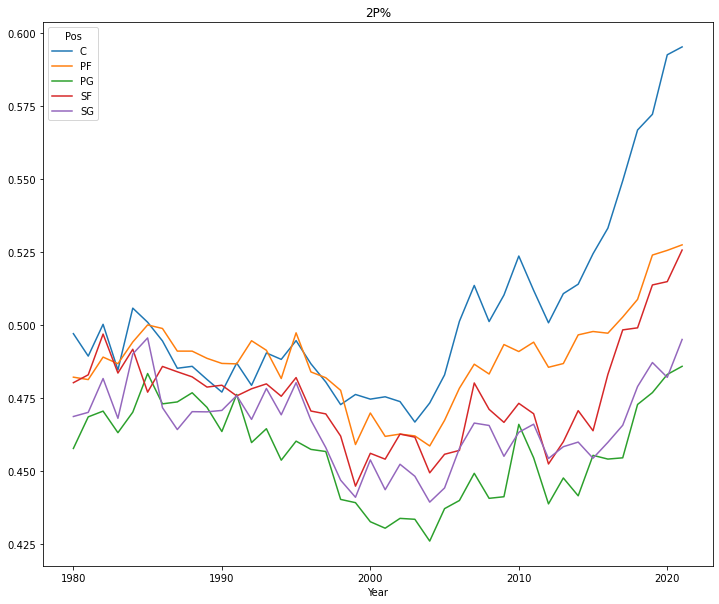

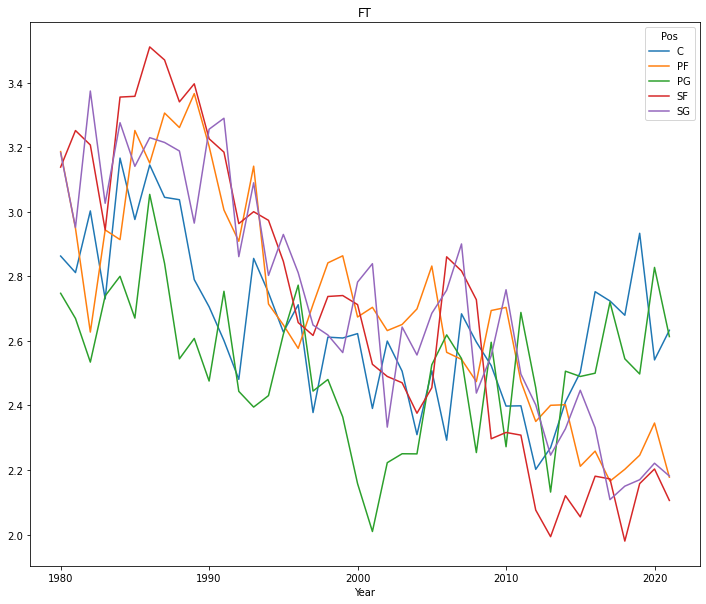

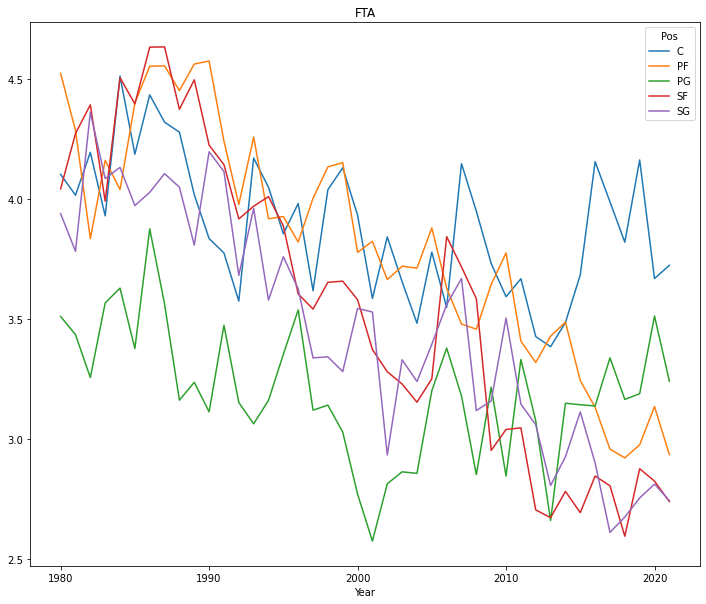

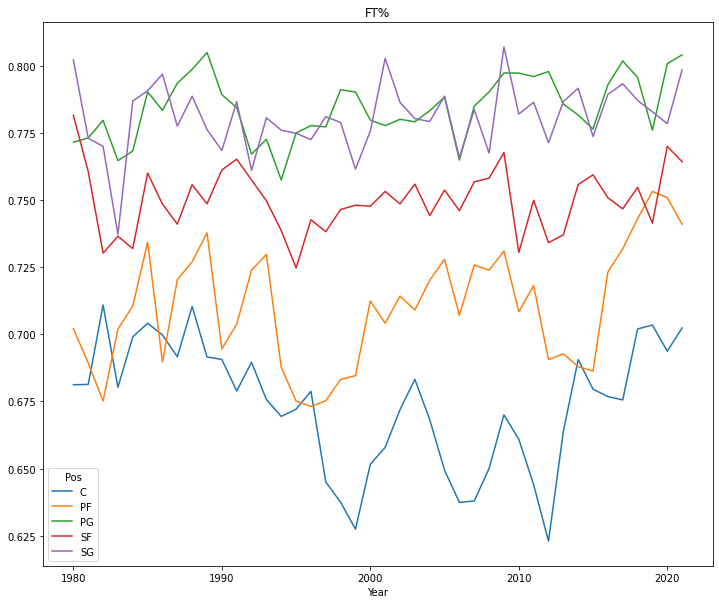

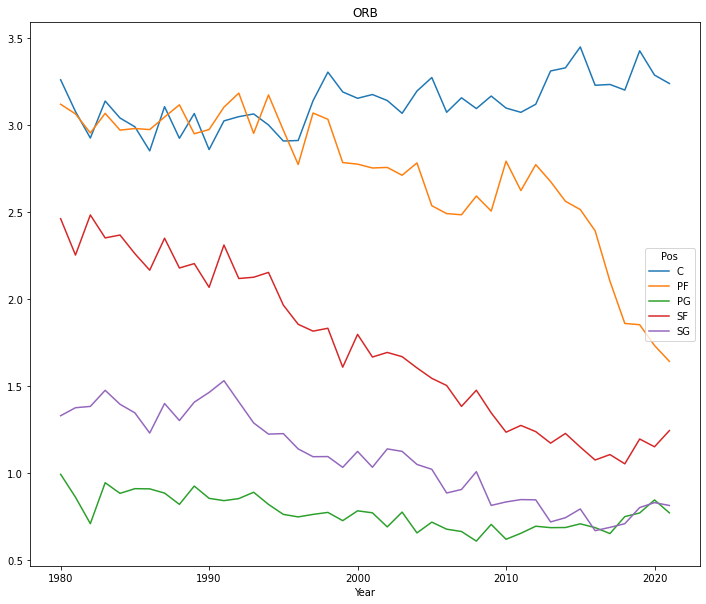

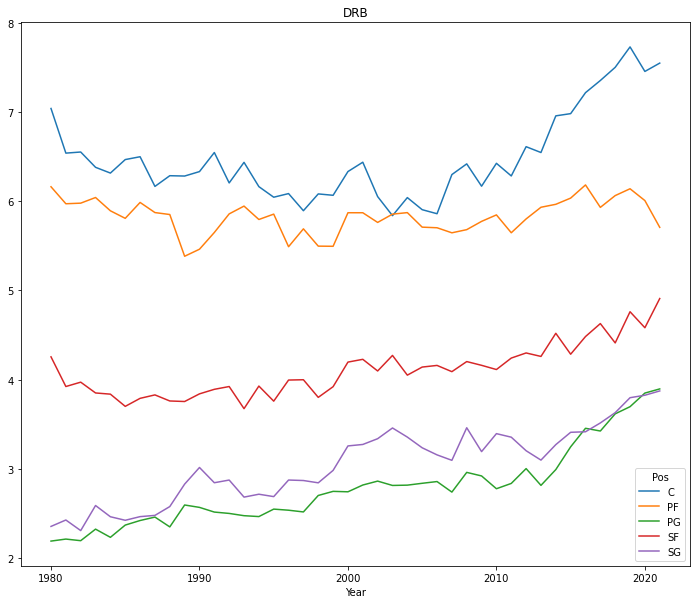

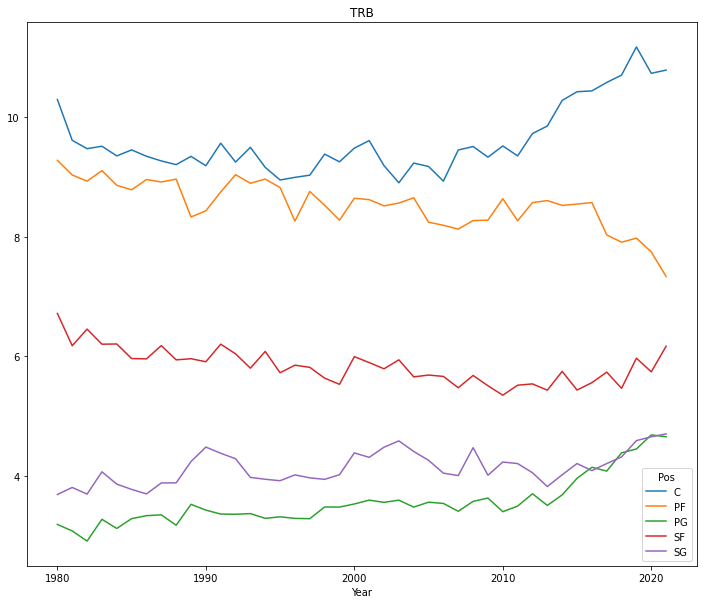

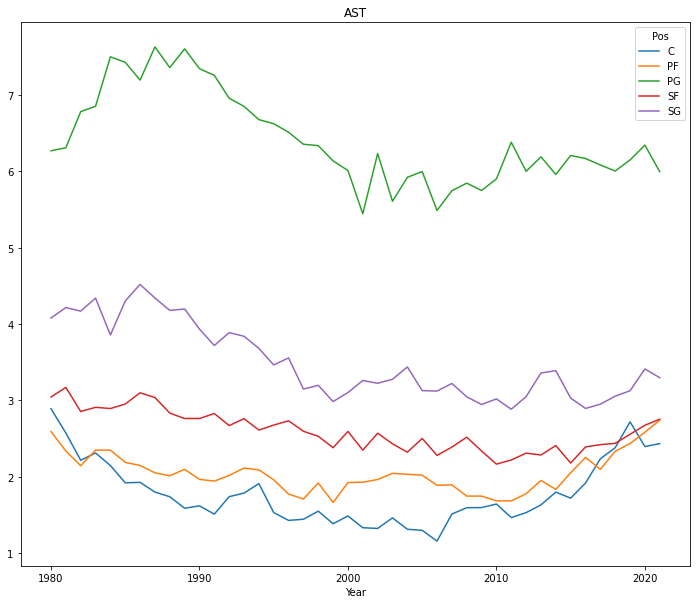

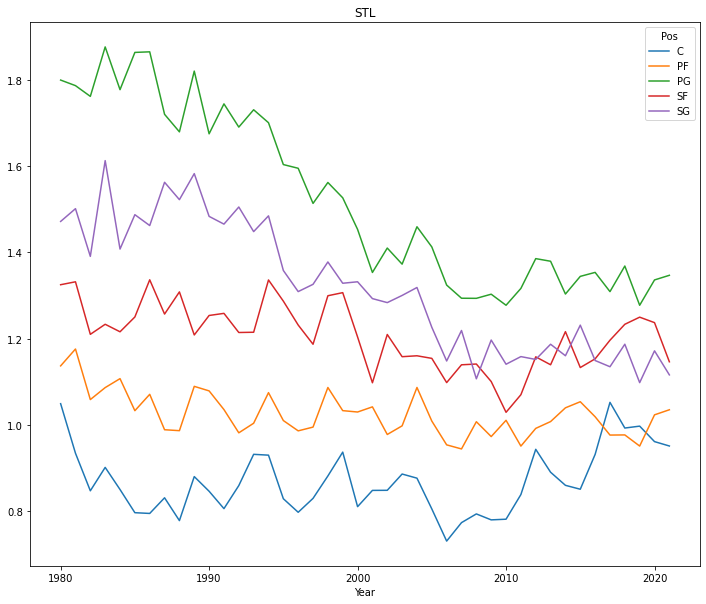

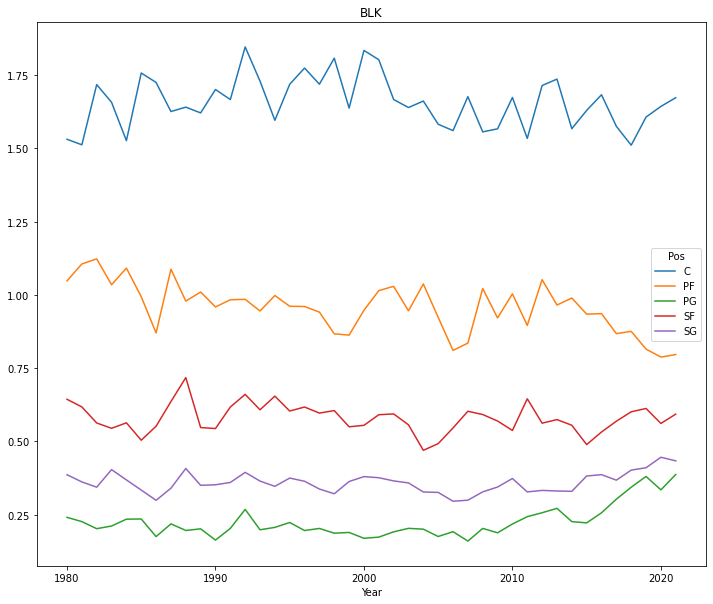

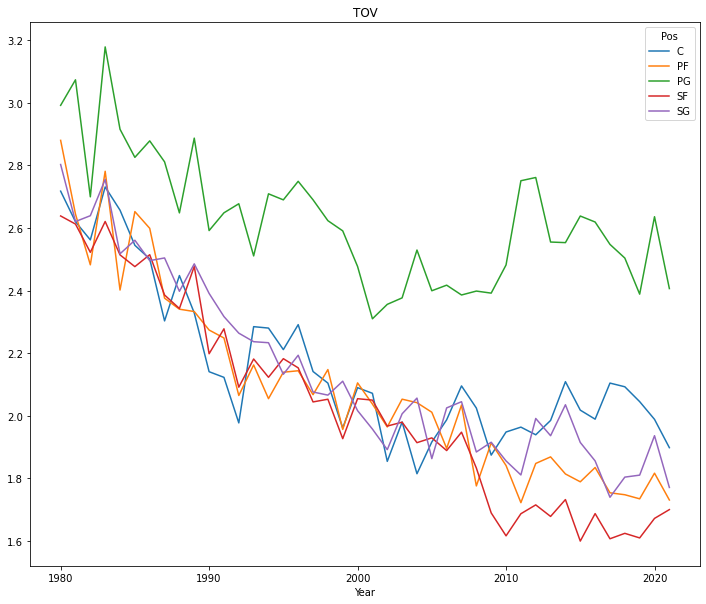

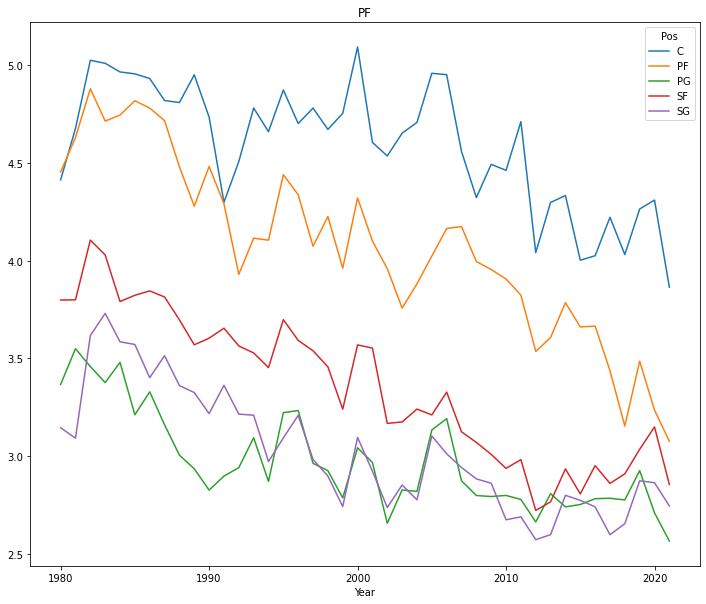

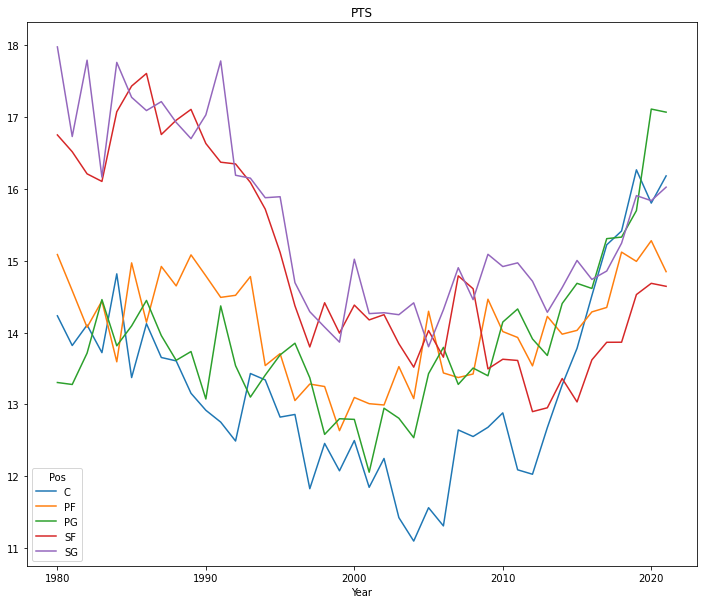

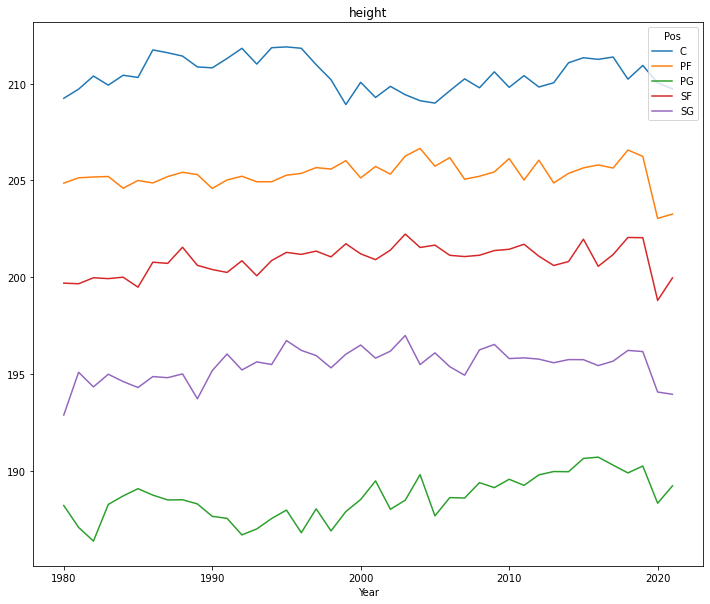

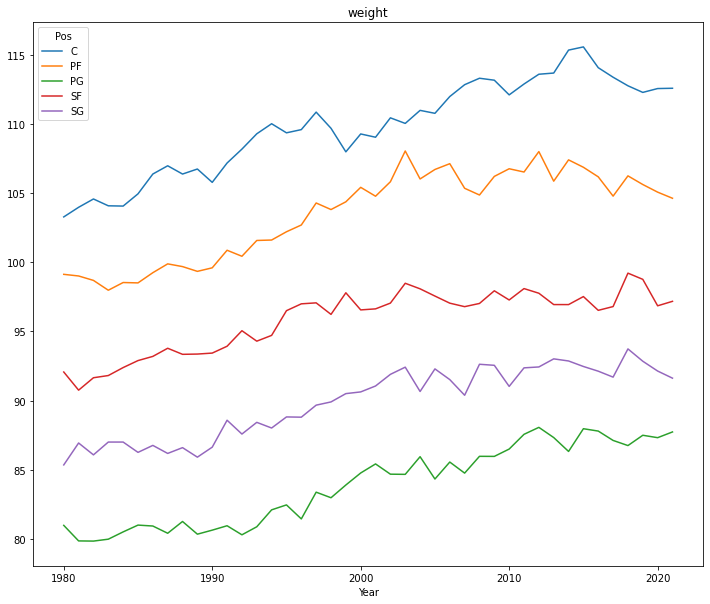

In [6]:
for column in data.columns[3:]:
    data.groupby(["Year",'Pos']).mean()[data[column].name].unstack().plot(kind='line',title=data[column].name)

#Features whose plots don't intersect such as ORB%, AST%, height, weight, can be good predictors.

MULTICOLLERATION REDUCING

In [6]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [7]:
data_with_const = add_constant(data)
data_with_const.columns

Index(['const', 'Year', 'Player', 'Pos', 'G', 'MP', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'height',
       'weight'],
      dtype='object')

In [8]:
data2=data_with_const.drop(['Player', 'G', 'MP','FG','FGA', '3P', '3PA', '2P', '2PA','FT','FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], axis=1)
##data2.corr()
data3=data2.drop(['Pos'],axis=1)

In [9]:
calc_vif(data3).sort_values(by=['VIF']) #VIF >5 - big multicollinearity

#ORB%, DRB% and TRB% relate to rebounds which causes multicorr.

variables           VIF
8       STL%      1.369682
15       FT%      1.520232
3        FTr      1.528566
11      USG%      1.602514
10      TOV%      1.874611
13       3P%      1.902151
1       Year      1.906985
9       BLK%      1.986000
7       AST%      2.844924
17    weight      3.747812
2       3PAr      4.000535
16    height      4.092171
14       2P%      7.619021
12       FG%     10.142333
4       ORB%    215.491204
5       DRB%    510.825585
6       TRB%   1199.720224
0      const  58886.099049

In [10]:
data3=data3.drop(['ORB%', 'DRB%'], axis=1)
calc_vif(data3).sort_values(by=['VIF'])

##drop of ORB% and DRB% reduced VIF, FG% need to be deleted too.

variables           VIF
6       STL%      1.360993
13       FT%      1.482556
3        FTr      1.510726
9       USG%      1.600304
1       Year      1.852046
8       TOV%      1.867676
11       3P%      1.893323
7       BLK%      1.983219
5       AST%      2.682842
4       TRB%      3.167402
15    weight      3.744901
2       3PAr      3.806106
14    height      4.059297
12       2P%      7.616548
10       FG%     10.061578
0      const  56959.017798

In [11]:
data3=data3.drop(['FG%'], axis=1)
calc_vif(data3).sort_values(by=['VIF'])
#Now dataset has no multicollinearity

variables           VIF
11       2P%      1.209261
6       STL%      1.346785
12       FT%      1.479656
3        FTr      1.501492
9       USG%      1.596312
1       Year      1.825234
10       3P%      1.836612
8       TOV%      1.862084
7       BLK%      1.975647
2       3PAr      2.610244
5       AST%      2.682314
4       TRB%      3.148240
14    weight      3.735066
13    height      4.049562
0      const  55830.409560

MODELS TRAINING

In [12]:
x = data3.drop(['const'], axis=1)
y = data['Pos']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state=0)
#train = 70%, test = 15%, val = 15%

DECISION TREE

In [39]:
#hyperparameter tuning
param_dist = {"max_depth":[4, 6, 8, 10, 12],
              "min_samples_split":[10,20,30,40,50,60,70,100],
             "min_samples_leaf":range(10,30)}
tree=DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_dist,cv=5,verbose=4)
tree_cv.fit(x_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.675 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.674 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.653 total time=   0.2s
[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.666 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=10, min_samples_split=10;, score=0.678 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.675 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.674 total time=   0.2s
[CV 3/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=10, min_samples_split=20;, score=0.666 total time=   0.2s
[CV 5/5] END max_depth=4, m

[CV 5/5] END max_depth=4, min_samples_leaf=12, min_samples_split=10;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=12, min_samples_split=20;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=12, min_samples_split=20;, score=0.674 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=12, min_samples_split=20;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=12, min_samples_split=20;, score=0.666 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=12, min_samples_split=20;, score=0.678 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=12, min_samples_split=30;, score=0.675 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=12, min_samples_split=30;, score=0.674 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=12, min_samples_split=30;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=12, min_samples_split=30;, score=0.666 total tim

[CV 4/5] END max_depth=4, min_samples_leaf=14, min_samples_split=20;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=14, min_samples_split=20;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=14, min_samples_split=30;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=14, min_samples_split=30;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=14, min_samples_split=30;, score=0.653 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=14, min_samples_split=30;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=14, min_samples_split=30;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=14, min_samples_split=40;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=14, min_samples_split=40;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=14, min_samples_split=40;, score=0.653 total tim

[CV 2/5] END max_depth=4, min_samples_leaf=16, min_samples_split=30;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=16, min_samples_split=30;, score=0.653 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=16, min_samples_split=30;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=16, min_samples_split=30;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=16, min_samples_split=40;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=16, min_samples_split=40;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=16, min_samples_split=40;, score=0.653 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=16, min_samples_split=40;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=16, min_samples_split=40;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=16, min_samples_split=50;, score=0.675 total tim

[CV 4/5] END max_depth=4, min_samples_leaf=18, min_samples_split=30;, score=0.666 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=18, min_samples_split=30;, score=0.678 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=18, min_samples_split=40;, score=0.675 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=18, min_samples_split=40;, score=0.674 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=18, min_samples_split=40;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=18, min_samples_split=40;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=18, min_samples_split=40;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=18, min_samples_split=50;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=18, min_samples_split=50;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=18, min_samples_split=50;, score=0.653 total tim

[CV 4/5] END max_depth=4, min_samples_leaf=20, min_samples_split=40;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=20, min_samples_split=40;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=20, min_samples_split=50;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=20, min_samples_split=50;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=20, min_samples_split=50;, score=0.653 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=20, min_samples_split=50;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=20, min_samples_split=50;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=20, min_samples_split=60;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=20, min_samples_split=60;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=20, min_samples_split=60;, score=0.653 total tim

[CV 3/5] END max_depth=4, min_samples_leaf=22, min_samples_split=50;, score=0.653 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=22, min_samples_split=50;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=22, min_samples_split=50;, score=0.678 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=22, min_samples_split=60;, score=0.675 total time=   0.2s
[CV 2/5] END max_depth=4, min_samples_leaf=22, min_samples_split=60;, score=0.674 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=22, min_samples_split=60;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=22, min_samples_split=60;, score=0.666 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=22, min_samples_split=60;, score=0.678 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=22, min_samples_split=70;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=22, min_samples_split=70;, score=0.674 total tim

[CV 2/5] END max_depth=4, min_samples_leaf=24, min_samples_split=60;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=24, min_samples_split=60;, score=0.653 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=24, min_samples_split=60;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=24, min_samples_split=60;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=24, min_samples_split=70;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=24, min_samples_split=70;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=24, min_samples_split=70;, score=0.653 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=24, min_samples_split=70;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=24, min_samples_split=70;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=24, min_samples_split=100;, score=0.675 total ti

[CV 4/5] END max_depth=4, min_samples_leaf=26, min_samples_split=60;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=26, min_samples_split=60;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=26, min_samples_split=70;, score=0.675 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=26, min_samples_split=70;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=26, min_samples_split=70;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=26, min_samples_split=70;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=26, min_samples_split=70;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=26, min_samples_split=100;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=26, min_samples_split=100;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=26, min_samples_split=100;, score=0.653 total 

[CV 1/5] END max_depth=4, min_samples_leaf=28, min_samples_split=70;, score=0.675 total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_leaf=28, min_samples_split=70;, score=0.674 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=28, min_samples_split=70;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=28, min_samples_split=70;, score=0.666 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=28, min_samples_split=70;, score=0.678 total time=   0.1s
[CV 1/5] END max_depth=4, min_samples_leaf=28, min_samples_split=100;, score=0.675 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=28, min_samples_split=100;, score=0.674 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=28, min_samples_split=100;, score=0.653 total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_leaf=28, min_samples_split=100;, score=0.666 total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_leaf=28, min_samples_split=100;, score=0.678 tota

[CV 3/5] END max_depth=6, min_samples_leaf=10, min_samples_split=70;, score=0.685 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=10, min_samples_split=70;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=10, min_samples_split=70;, score=0.699 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=10, min_samples_split=100;, score=0.709 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=10, min_samples_split=100;, score=0.698 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=10, min_samples_split=100;, score=0.687 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=10, min_samples_split=100;, score=0.704 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=10, min_samples_split=100;, score=0.700 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=11, min_samples_split=10;, score=0.710 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=11, min_samples_split=10;, score=0.695 tota

[CV 5/5] END max_depth=6, min_samples_leaf=12, min_samples_split=70;, score=0.699 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=12, min_samples_split=100;, score=0.708 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=12, min_samples_split=100;, score=0.696 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=12, min_samples_split=100;, score=0.687 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=12, min_samples_split=100;, score=0.704 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=12, min_samples_split=100;, score=0.700 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=13, min_samples_split=10;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=13, min_samples_split=10;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=13, min_samples_split=10;, score=0.685 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=13, min_samples_split=10;, score=0.698 tota

[CV 2/5] END max_depth=6, min_samples_leaf=14, min_samples_split=100;, score=0.694 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=14, min_samples_split=100;, score=0.687 total time=   0.2s
[CV 4/5] END max_depth=6, min_samples_leaf=14, min_samples_split=100;, score=0.704 total time=   0.2s
[CV 5/5] END max_depth=6, min_samples_leaf=14, min_samples_split=100;, score=0.701 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=15, min_samples_split=10;, score=0.708 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=15, min_samples_split=10;, score=0.693 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=15, min_samples_split=10;, score=0.686 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=15, min_samples_split=10;, score=0.698 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=15, min_samples_split=10;, score=0.702 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=15, min_samples_split=20;, score=0.708 total

[CV 5/5] END max_depth=6, min_samples_leaf=16, min_samples_split=100;, score=0.699 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=17, min_samples_split=10;, score=0.708 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=17, min_samples_split=10;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=17, min_samples_split=10;, score=0.687 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=17, min_samples_split=10;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=17, min_samples_split=10;, score=0.701 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=17, min_samples_split=20;, score=0.708 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=17, min_samples_split=20;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=17, min_samples_split=20;, score=0.687 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=17, min_samples_split=20;, score=0.698 total ti

[CV 5/5] END max_depth=6, min_samples_leaf=19, min_samples_split=10;, score=0.697 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=19, min_samples_split=20;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=19, min_samples_split=20;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=19, min_samples_split=20;, score=0.687 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=19, min_samples_split=20;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=19, min_samples_split=20;, score=0.697 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=19, min_samples_split=30;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=19, min_samples_split=30;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=19, min_samples_split=30;, score=0.687 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=19, min_samples_split=30;, score=0.698 total tim

[CV 2/5] END max_depth=6, min_samples_leaf=21, min_samples_split=20;, score=0.694 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=21, min_samples_split=20;, score=0.686 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=21, min_samples_split=20;, score=0.698 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=21, min_samples_split=20;, score=0.697 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=21, min_samples_split=30;, score=0.707 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=21, min_samples_split=30;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=21, min_samples_split=30;, score=0.686 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=21, min_samples_split=30;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=21, min_samples_split=30;, score=0.697 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=21, min_samples_split=40;, score=0.707 total tim

[CV 4/5] END max_depth=6, min_samples_leaf=23, min_samples_split=20;, score=0.698 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=23, min_samples_split=20;, score=0.697 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=23, min_samples_split=30;, score=0.707 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=23, min_samples_split=30;, score=0.695 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=23, min_samples_split=30;, score=0.686 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=23, min_samples_split=30;, score=0.698 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=23, min_samples_split=30;, score=0.697 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=23, min_samples_split=40;, score=0.707 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=23, min_samples_split=40;, score=0.695 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=23, min_samples_split=40;, score=0.686 total tim

[CV 1/5] END max_depth=6, min_samples_leaf=25, min_samples_split=30;, score=0.707 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=25, min_samples_split=30;, score=0.695 total time=   0.2s
[CV 3/5] END max_depth=6, min_samples_leaf=25, min_samples_split=30;, score=0.686 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=25, min_samples_split=30;, score=0.698 total time=   0.1s
[CV 5/5] END max_depth=6, min_samples_leaf=25, min_samples_split=30;, score=0.697 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=25, min_samples_split=40;, score=0.707 total time=   0.1s
[CV 2/5] END max_depth=6, min_samples_leaf=25, min_samples_split=40;, score=0.695 total time=   0.1s
[CV 3/5] END max_depth=6, min_samples_leaf=25, min_samples_split=40;, score=0.686 total time=   0.1s
[CV 4/5] END max_depth=6, min_samples_leaf=25, min_samples_split=40;, score=0.698 total time=   0.2s
[CV 5/5] END max_depth=6, min_samples_leaf=25, min_samples_split=40;, score=0.697 total tim

[CV 3/5] END max_depth=6, min_samples_leaf=27, min_samples_split=30;, score=0.685 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=27, min_samples_split=30;, score=0.697 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=27, min_samples_split=30;, score=0.698 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=27, min_samples_split=40;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=27, min_samples_split=40;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=27, min_samples_split=40;, score=0.685 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=27, min_samples_split=40;, score=0.697 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=27, min_samples_split=40;, score=0.698 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=27, min_samples_split=50;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=27, min_samples_split=50;, score=0.694 total tim

[CV 1/5] END max_depth=6, min_samples_leaf=29, min_samples_split=40;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=29, min_samples_split=40;, score=0.695 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=29, min_samples_split=40;, score=0.682 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=29, min_samples_split=40;, score=0.697 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=29, min_samples_split=40;, score=0.698 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=29, min_samples_split=50;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=29, min_samples_split=50;, score=0.695 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=29, min_samples_split=50;, score=0.682 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=29, min_samples_split=50;, score=0.697 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=29, min_samples_split=50;, score=0.698 total tim

[CV 3/5] END max_depth=8, min_samples_leaf=11, min_samples_split=40;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=11, min_samples_split=40;, score=0.705 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=11, min_samples_split=40;, score=0.710 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=11, min_samples_split=50;, score=0.712 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=11, min_samples_split=50;, score=0.695 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=11, min_samples_split=50;, score=0.715 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=11, min_samples_split=50;, score=0.708 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=11, min_samples_split=50;, score=0.708 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=11, min_samples_split=60;, score=0.709 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=11, min_samples_split=60;, score=0.691 total tim

[CV 5/5] END max_depth=8, min_samples_leaf=13, min_samples_split=40;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=13, min_samples_split=50;, score=0.711 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=13, min_samples_split=50;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=13, min_samples_split=50;, score=0.715 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=13, min_samples_split=50;, score=0.705 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=13, min_samples_split=50;, score=0.710 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=13, min_samples_split=60;, score=0.709 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=13, min_samples_split=60;, score=0.689 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=13, min_samples_split=60;, score=0.711 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=13, min_samples_split=60;, score=0.699 total tim

[CV 2/5] END max_depth=8, min_samples_leaf=15, min_samples_split=50;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=15, min_samples_split=50;, score=0.717 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=15, min_samples_split=50;, score=0.703 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=15, min_samples_split=50;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=15, min_samples_split=60;, score=0.710 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=15, min_samples_split=60;, score=0.688 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=15, min_samples_split=60;, score=0.715 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=15, min_samples_split=60;, score=0.700 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=15, min_samples_split=60;, score=0.710 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=15, min_samples_split=70;, score=0.708 total tim

[CV 1/5] END max_depth=8, min_samples_leaf=17, min_samples_split=60;, score=0.712 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=17, min_samples_split=60;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=17, min_samples_split=60;, score=0.716 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=17, min_samples_split=60;, score=0.701 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=17, min_samples_split=60;, score=0.709 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=17, min_samples_split=70;, score=0.711 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=17, min_samples_split=70;, score=0.689 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=17, min_samples_split=70;, score=0.712 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=17, min_samples_split=70;, score=0.702 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=17, min_samples_split=70;, score=0.709 total tim

[CV 4/5] END max_depth=8, min_samples_leaf=19, min_samples_split=60;, score=0.703 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=19, min_samples_split=60;, score=0.710 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=19, min_samples_split=70;, score=0.709 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=19, min_samples_split=70;, score=0.690 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=19, min_samples_split=70;, score=0.712 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=19, min_samples_split=70;, score=0.704 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=19, min_samples_split=70;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=19, min_samples_split=100;, score=0.706 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=19, min_samples_split=100;, score=0.696 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=19, min_samples_split=100;, score=0.713 total 

[CV 1/5] END max_depth=8, min_samples_leaf=21, min_samples_split=70;, score=0.712 total time=   0.1s
[CV 2/5] END max_depth=8, min_samples_leaf=21, min_samples_split=70;, score=0.691 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=21, min_samples_split=70;, score=0.709 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=21, min_samples_split=70;, score=0.704 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=21, min_samples_split=70;, score=0.710 total time=   0.1s
[CV 1/5] END max_depth=8, min_samples_leaf=21, min_samples_split=100;, score=0.709 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=21, min_samples_split=100;, score=0.698 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=21, min_samples_split=100;, score=0.710 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=21, min_samples_split=100;, score=0.708 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=21, min_samples_split=100;, score=0.712 tota

[CV 4/5] END max_depth=8, min_samples_leaf=23, min_samples_split=70;, score=0.704 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=23, min_samples_split=70;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=23, min_samples_split=100;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=23, min_samples_split=100;, score=0.698 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=23, min_samples_split=100;, score=0.710 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=23, min_samples_split=100;, score=0.708 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=23, min_samples_split=100;, score=0.712 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=24, min_samples_split=10;, score=0.712 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=24, min_samples_split=10;, score=0.698 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=24, min_samples_split=10;, score=0.706 tota

[CV 2/5] END max_depth=8, min_samples_leaf=25, min_samples_split=100;, score=0.699 total time=   0.1s
[CV 3/5] END max_depth=8, min_samples_leaf=25, min_samples_split=100;, score=0.710 total time=   0.1s
[CV 4/5] END max_depth=8, min_samples_leaf=25, min_samples_split=100;, score=0.707 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=25, min_samples_split=100;, score=0.714 total time=   0.1s
[CV 1/5] END max_depth=8, min_samples_leaf=26, min_samples_split=10;, score=0.710 total time=   0.1s
[CV 2/5] END max_depth=8, min_samples_leaf=26, min_samples_split=10;, score=0.697 total time=   0.1s
[CV 3/5] END max_depth=8, min_samples_leaf=26, min_samples_split=10;, score=0.710 total time=   0.1s
[CV 4/5] END max_depth=8, min_samples_leaf=26, min_samples_split=10;, score=0.706 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=26, min_samples_split=10;, score=0.712 total time=   0.1s
[CV 1/5] END max_depth=8, min_samples_leaf=26, min_samples_split=20;, score=0.710 total

[CV 1/5] END max_depth=8, min_samples_leaf=28, min_samples_split=10;, score=0.710 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=28, min_samples_split=10;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=28, min_samples_split=10;, score=0.708 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=28, min_samples_split=10;, score=0.700 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=28, min_samples_split=10;, score=0.712 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=28, min_samples_split=20;, score=0.710 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=28, min_samples_split=20;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=28, min_samples_split=20;, score=0.708 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=28, min_samples_split=20;, score=0.700 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=28, min_samples_split=20;, score=0.712 total tim

[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.711 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.714 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.714 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.720 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.699 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.712 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.713 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.714 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=30;, score=0.718 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=30;, score=0.696

[CV 4/5] END max_depth=10, min_samples_leaf=12, min_samples_split=10;, score=0.711 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=12, min_samples_split=10;, score=0.713 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=12, min_samples_split=20;, score=0.715 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=12, min_samples_split=20;, score=0.689 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=12, min_samples_split=20;, score=0.711 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=12, min_samples_split=20;, score=0.711 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=12, min_samples_split=20;, score=0.713 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=12, min_samples_split=30;, score=0.719 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=12, min_samples_split=30;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=12, min_samples_split=30;, score=0.713

[CV 2/5] END max_depth=10, min_samples_leaf=14, min_samples_split=20;, score=0.687 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=14, min_samples_split=20;, score=0.713 total time=   0.5s
[CV 4/5] END max_depth=10, min_samples_leaf=14, min_samples_split=20;, score=0.704 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=14, min_samples_split=20;, score=0.716 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=14, min_samples_split=30;, score=0.717 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=14, min_samples_split=30;, score=0.687 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=14, min_samples_split=30;, score=0.716 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=14, min_samples_split=30;, score=0.704 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=14, min_samples_split=30;, score=0.716 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=14, min_samples_split=40;, score=0.720

[CV 3/5] END max_depth=10, min_samples_leaf=16, min_samples_split=20;, score=0.722 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=16, min_samples_split=20;, score=0.700 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=16, min_samples_split=20;, score=0.713 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=16, min_samples_split=30;, score=0.724 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=16, min_samples_split=30;, score=0.701 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=16, min_samples_split=30;, score=0.722 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=16, min_samples_split=30;, score=0.701 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=16, min_samples_split=30;, score=0.713 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=16, min_samples_split=40;, score=0.721 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=16, min_samples_split=40;, score=0.704

[CV 5/5] END max_depth=10, min_samples_leaf=18, min_samples_split=20;, score=0.706 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=18, min_samples_split=30;, score=0.718 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=18, min_samples_split=30;, score=0.702 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=18, min_samples_split=30;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=18, min_samples_split=30;, score=0.707 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=18, min_samples_split=30;, score=0.706 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=18, min_samples_split=40;, score=0.719 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=18, min_samples_split=40;, score=0.704 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=18, min_samples_split=40;, score=0.715 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=18, min_samples_split=40;, score=0.705

[CV 3/5] END max_depth=10, min_samples_leaf=20, min_samples_split=30;, score=0.711 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=20, min_samples_split=30;, score=0.703 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=20, min_samples_split=30;, score=0.710 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40;, score=0.729 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40;, score=0.706 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40;, score=0.711 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40;, score=0.703 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40;, score=0.710 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=20, min_samples_split=50;, score=0.726 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=20, min_samples_split=50;, score=0.702

[CV 5/5] END max_depth=10, min_samples_leaf=22, min_samples_split=30;, score=0.709 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=22, min_samples_split=40;, score=0.725 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=22, min_samples_split=40;, score=0.701 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=22, min_samples_split=40;, score=0.709 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=22, min_samples_split=40;, score=0.704 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=22, min_samples_split=40;, score=0.709 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=22, min_samples_split=50;, score=0.724 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=22, min_samples_split=50;, score=0.701 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=22, min_samples_split=50;, score=0.709 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=22, min_samples_split=50;, score=0.704

[CV 2/5] END max_depth=10, min_samples_leaf=24, min_samples_split=40;, score=0.697 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=24, min_samples_split=40;, score=0.709 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=24, min_samples_split=40;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=24, min_samples_split=40;, score=0.716 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=24, min_samples_split=50;, score=0.722 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=24, min_samples_split=50;, score=0.695 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=24, min_samples_split=50;, score=0.710 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=24, min_samples_split=50;, score=0.701 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=24, min_samples_split=50;, score=0.714 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=24, min_samples_split=60;, score=0.721

[CV 4/5] END max_depth=10, min_samples_leaf=26, min_samples_split=40;, score=0.703 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=26, min_samples_split=40;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=26, min_samples_split=50;, score=0.718 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=26, min_samples_split=50;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=26, min_samples_split=50;, score=0.715 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=26, min_samples_split=50;, score=0.703 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=26, min_samples_split=50;, score=0.711 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=26, min_samples_split=60;, score=0.719 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=26, min_samples_split=60;, score=0.690 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=26, min_samples_split=60;, score=0.715

[CV 5/5] END max_depth=10, min_samples_leaf=28, min_samples_split=40;, score=0.709 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=28, min_samples_split=50;, score=0.720 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=28, min_samples_split=50;, score=0.688 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=28, min_samples_split=50;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=28, min_samples_split=50;, score=0.700 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=28, min_samples_split=50;, score=0.709 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=28, min_samples_split=60;, score=0.720 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=28, min_samples_split=60;, score=0.688 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=28, min_samples_split=60;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=28, min_samples_split=60;, score=0.702

[CV 1/5] END max_depth=12, min_samples_leaf=10, min_samples_split=50;, score=0.722 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=10, min_samples_split=50;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=10, min_samples_split=50;, score=0.724 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=10, min_samples_split=50;, score=0.697 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=10, min_samples_split=50;, score=0.704 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=10, min_samples_split=60;, score=0.720 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=10, min_samples_split=60;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=10, min_samples_split=60;, score=0.724 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=10, min_samples_split=60;, score=0.691 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=10, min_samples_split=60;, score=0.702

[CV 3/5] END max_depth=12, min_samples_leaf=12, min_samples_split=50;, score=0.721 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=12, min_samples_split=50;, score=0.697 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=12, min_samples_split=50;, score=0.702 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=12, min_samples_split=60;, score=0.714 total time=   0.1s
[CV 2/5] END max_depth=12, min_samples_leaf=12, min_samples_split=60;, score=0.689 total time=   0.1s
[CV 3/5] END max_depth=12, min_samples_leaf=12, min_samples_split=60;, score=0.722 total time=   0.1s
[CV 4/5] END max_depth=12, min_samples_leaf=12, min_samples_split=60;, score=0.691 total time=   0.1s
[CV 5/5] END max_depth=12, min_samples_leaf=12, min_samples_split=60;, score=0.699 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=12, min_samples_split=70;, score=0.709 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=12, min_samples_split=70;, score=0.685

[CV 3/5] END max_depth=12, min_samples_leaf=16, min_samples_split=50;, score=0.722 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=16, min_samples_split=50;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=16, min_samples_split=50;, score=0.698 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=16, min_samples_split=60;, score=0.720 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=16, min_samples_split=60;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=16, min_samples_split=60;, score=0.721 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=16, min_samples_split=60;, score=0.696 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=16, min_samples_split=60;, score=0.702 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=16, min_samples_split=70;, score=0.715 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=16, min_samples_split=70;, score=0.690

[CV 4/5] END max_depth=12, min_samples_leaf=18, min_samples_split=50;, score=0.701 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=18, min_samples_split=50;, score=0.696 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=18, min_samples_split=60;, score=0.718 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=18, min_samples_split=60;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=18, min_samples_split=60;, score=0.717 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=18, min_samples_split=60;, score=0.697 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=18, min_samples_split=60;, score=0.701 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=18, min_samples_split=70;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=18, min_samples_split=70;, score=0.690 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=18, min_samples_split=70;, score=0.716

[CV 5/5] END max_depth=12, min_samples_leaf=20, min_samples_split=50;, score=0.702 total time=   0.1s
[CV 1/5] END max_depth=12, min_samples_leaf=20, min_samples_split=60;, score=0.721 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=20, min_samples_split=60;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=20, min_samples_split=60;, score=0.718 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=20, min_samples_split=60;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=20, min_samples_split=60;, score=0.703 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=20, min_samples_split=70;, score=0.717 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=20, min_samples_split=70;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=20, min_samples_split=70;, score=0.717 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=20, min_samples_split=70;, score=0.699

[CV 2/5] END max_depth=12, min_samples_leaf=22, min_samples_split=60;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=22, min_samples_split=60;, score=0.716 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=22, min_samples_split=60;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=22, min_samples_split=60;, score=0.701 total time=   0.1s
[CV 1/5] END max_depth=12, min_samples_leaf=22, min_samples_split=70;, score=0.716 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=22, min_samples_split=70;, score=0.692 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=22, min_samples_split=70;, score=0.716 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=22, min_samples_split=70;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=22, min_samples_split=70;, score=0.704 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=22, min_samples_split=100;, score=0.70

[CV 3/5] END max_depth=12, min_samples_leaf=24, min_samples_split=60;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=24, min_samples_split=60;, score=0.696 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=24, min_samples_split=60;, score=0.705 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=24, min_samples_split=70;, score=0.714 total time=   0.1s
[CV 2/5] END max_depth=12, min_samples_leaf=24, min_samples_split=70;, score=0.689 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=24, min_samples_split=70;, score=0.714 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=24, min_samples_split=70;, score=0.698 total time=   0.2s
[CV 5/5] END max_depth=12, min_samples_leaf=24, min_samples_split=70;, score=0.707 total time=   0.2s
[CV 1/5] END max_depth=12, min_samples_leaf=24, min_samples_split=100;, score=0.707 total time=   0.1s
[CV 2/5] END max_depth=12, min_samples_leaf=24, min_samples_split=100;, score=0.6

[CV 4/5] END max_depth=12, min_samples_leaf=26, min_samples_split=60;, score=0.698 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=26, min_samples_split=60;, score=0.703 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=26, min_samples_split=70;, score=0.711 total time=   0.1s
[CV 2/5] END max_depth=12, min_samples_leaf=26, min_samples_split=70;, score=0.692 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=26, min_samples_split=70;, score=0.713 total time=   0.1s
[CV 4/5] END max_depth=12, min_samples_leaf=26, min_samples_split=70;, score=0.697 total time=   0.2s
[CV 5/5] END max_depth=12, min_samples_leaf=26, min_samples_split=70;, score=0.707 total time=   0.2s
[CV 1/5] END max_depth=12, min_samples_leaf=26, min_samples_split=100;, score=0.706 total time=   0.1s
[CV 2/5] END max_depth=12, min_samples_leaf=26, min_samples_split=100;, score=0.695 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=26, min_samples_split=100;, score=0.

[CV 5/5] END max_depth=12, min_samples_leaf=28, min_samples_split=60;, score=0.703 total time=   0.2s
[CV 1/5] END max_depth=12, min_samples_leaf=28, min_samples_split=70;, score=0.715 total time=   0.2s
[CV 2/5] END max_depth=12, min_samples_leaf=28, min_samples_split=70;, score=0.690 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=28, min_samples_split=70;, score=0.709 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=28, min_samples_split=70;, score=0.701 total time=   0.2s
[CV 5/5] END max_depth=12, min_samples_leaf=28, min_samples_split=70;, score=0.706 total time=   0.2s
[CV 1/5] END max_depth=12, min_samples_leaf=28, min_samples_split=100;, score=0.709 total time=   0.1s
[CV 2/5] END max_depth=12, min_samples_leaf=28, min_samples_split=100;, score=0.694 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=28, min_samples_split=100;, score=0.714 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=28, min_samples_split=100;, score=0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': range(10, 30),
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70,
                                               100]},
             verbose=4)

In [40]:
print("Best parameters : {}".format(tree_cv.best_params_))
print("Best score : {}".format(tree_cv.best_score_))
print("Best model : {}".format(tree_cv.best_estimator_))

Najlepsze parametry : {'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 30}
Najlepszy wynik : 0.7122696629213483
Najlepszy model : DecisionTreeClassifier(max_depth=10, min_samples_leaf=16, min_samples_split=30)


In [23]:
clf= DecisionTreeClassifier(max_depth=10, min_samples_leaf=16, min_samples_split=30) 
clf = clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)
y_train_pred_dt = clf.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Accuracy_train:",metrics.accuracy_score(y_train, y_train_pred_dt))

Accuracy: 0.7202181208053692
Accuracy_train: 0.7864269662921348


RANDOM FOREST

In [44]:
rnd=RandomForestClassifier()
param_dist_rnd = {"n_estimators":[500,1000],
             "max_features": [8,10,14],
             "min_samples_leaf":[1,10,30],
             "n_jobs":[-1]}
rnd_cv = GridSearchCV(rnd,param_dist_rnd,cv=3,verbose=4)
rnd_cv.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_features=8, min_samples_leaf=1, n_estimators=500, n_jobs=-1;, score=0.782 total time=  16.9s
[CV 2/3] END max_features=8, min_samples_leaf=1, n_estimators=500, n_jobs=-1;, score=0.779 total time=   8.2s
[CV 3/3] END max_features=8, min_samples_leaf=1, n_estimators=500, n_jobs=-1;, score=0.786 total time=   9.4s
[CV 1/3] END max_features=8, min_samples_leaf=1, n_estimators=1000, n_jobs=-1;, score=0.781 total time=  18.4s
[CV 2/3] END max_features=8, min_samples_leaf=1, n_estimators=1000, n_jobs=-1;, score=0.782 total time=  19.2s
[CV 3/3] END max_features=8, min_samples_leaf=1, n_estimators=1000, n_jobs=-1;, score=0.784 total time=  21.1s
[CV 1/3] END max_features=8, min_samples_leaf=10, n_estimators=500, n_jobs=-1;, score=0.759 total time=   7.1s
[CV 2/3] END max_features=8, min_samples_leaf=10, n_estimators=500, n_jobs=-1;, score=0.756 total time=   7.0s
[CV 3/3] END max_features=8, min_samples_leaf=10, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': [8, 10, 14],
                         'min_samples_leaf': [1, 10, 30],
                         'n_estimators': [500, 1000], 'n_jobs': [-1]},
             verbose=4)

In [45]:
print("Best parameters : {}".format(rnd_cv.best_params_))
print("Best score : {}".format(rnd_cv.best_score_))
print("Best model : {}".format(rnd_cv.best_estimator_))

Najlepsze parametry : {'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 1000, 'n_jobs': -1}
Najlepszy wynik : 0.7823821159043538
Najlepszy model : RandomForestClassifier(max_features=8, n_estimators=1000, n_jobs=-1)


In [29]:
rnd_clf = RandomForestClassifier(max_features=8, n_estimators=1000, n_jobs=-1)
rnd_clf.fit(x_train,y_train)
y_pred_rnd = rnd_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rnd))
y_train_pred_rnd = rnd_clf.predict(x_train)
print("Accuracy_train:",metrics.accuracy_score(y_train, y_train_pred_rnd))

Accuracy: 0.7927852348993288
Accuracy_train: 1.0


XGBOOST

In [35]:
model=xgb.XGBClassifier(objective="multi:softmax",num_class=5,verbosity=0)
param_dist_xgb = {"n_estimators":[200,300,400],
             "eta":[0.1],
                 'max_depth':[10]}
xgb_cv = GridSearchCV(model,param_dist_xgb,cv=3,verbose=4)
xgb_cv.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END eta=0.1, max_depth=10, n_estimators=200;, score=0.778 total time=  21.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END eta=0.1, max_depth=10, n_estimators=200;, score=0.780 total time=  21.5s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END eta=0.1, max_depth=10, n_estimators=200;, score=0.776 total time=  16.6s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END eta=0.1, max_depth=10, n_estimators=300;, score=0.779 total time=  25.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END eta=0.1, max_depth=10, n_estimators=300;, score=0.779 total time=  25.9s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END eta=0.1, max_depth=10, n_estimators=300;, score=0.779 total time=  23.9s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/3] END eta=0.1, max_depth=10, n_estimators=400;, score=0.778 total time=  27.9s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/3] END eta=0.1, max_depth=10, n_estimators=400;, score=0.782 total time=  27.8s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/3] END eta=0.1, max_depth=10, n_estimators=400;, score=0.775 total time=  31.3s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None,
                                     random_state=None, reg_alpha

In [52]:
print("Best parameters : {}".format(xgb_cv.best_params_))
print("Best score : {}".format(xgb_cv.best_score_))
print("Best model : {}".format(xgb_cv.best_estimator_))

Najlepsze parametry : {'eta': 0.1, 'max_depth': 10, 'n_estimators': 300}
Najlepszy wynik : 0.7789663208795888
Najlepszy model : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, ...)


In [53]:
xgb_clf=xgb.XGBClassifier(max_depth=10,eta=0.1,n_estimators=300,objective="multi:softmax",num_class=5)
xgb_clf.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)])
y_pred_xgb = xgb_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
y_train_pred_xgb = xgb_clf.predict(x_train)
print("Accuracy_train:",metrics.accuracy_score(y_train, y_train_pred_xgb))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-mlogloss:1.44880	validation_1-mlogloss:1.47762
[1]	validation_0-mlogloss:1.31639	validation_1-mlogloss:1.36963
[2]	validation_0-mlogloss:1.20408	validation_1-mlogloss:1.27921
[3]	validation_0-mlogloss:1.10716	validation_1-mlogloss:1.20186
[4]	validation_0-mlogloss:1.02222	validation_1-mlogloss:1.13580
[5]	validation_0-mlogloss:0.94858	validation_1-mlogloss:1.07804
[6]	validation_0-mlogloss:0.88299	validation_1-mlogloss:1.02772
[7]	validation_0-mlogloss:0.82487	validation_1-mlogloss:0.98386
[8]	validation_0-mlogloss:0.77228	validation_1-mlogloss:0.94427
[9]	validation_0-mlogloss:0.72481	validation_1-mlogloss:0.90880
[10]	validation_0-mlogloss:0.68215	validation_1-mlogloss:0.87756
[11]	validation_0-mlogloss:0.64383	validation_1-mlogloss:0.84931
[12]	validation_0-mlogloss:0.60877	validation_1-mlogloss:0.82381
[13]	validation_0-mlogloss:0.57626	validation_1-mlogloss:0.80039
[14]	validation_0-mlogloss:0.54708	validation_1-mlogloss:0.77955
[15]	validation_0-mlogloss:0.51993	

[126]	validation_0-mlogloss:0.05755	validation_1-mlogloss:0.55593
[127]	validation_0-mlogloss:0.05669	validation_1-mlogloss:0.55636
[128]	validation_0-mlogloss:0.05587	validation_1-mlogloss:0.55656
[129]	validation_0-mlogloss:0.05483	validation_1-mlogloss:0.55652
[130]	validation_0-mlogloss:0.05414	validation_1-mlogloss:0.55694
[131]	validation_0-mlogloss:0.05355	validation_1-mlogloss:0.55705
[132]	validation_0-mlogloss:0.05269	validation_1-mlogloss:0.55697
[133]	validation_0-mlogloss:0.05188	validation_1-mlogloss:0.55741
[134]	validation_0-mlogloss:0.05104	validation_1-mlogloss:0.55749
[135]	validation_0-mlogloss:0.05037	validation_1-mlogloss:0.55806
[136]	validation_0-mlogloss:0.04965	validation_1-mlogloss:0.55858
[137]	validation_0-mlogloss:0.04892	validation_1-mlogloss:0.55881
[138]	validation_0-mlogloss:0.04833	validation_1-mlogloss:0.55900
[139]	validation_0-mlogloss:0.04767	validation_1-mlogloss:0.55937
[140]	validation_0-mlogloss:0.04699	validation_1-mlogloss:0.55941
[141]	vali

[251]	validation_0-mlogloss:0.01632	validation_1-mlogloss:0.60142
[252]	validation_0-mlogloss:0.01621	validation_1-mlogloss:0.60190
[253]	validation_0-mlogloss:0.01611	validation_1-mlogloss:0.60214
[254]	validation_0-mlogloss:0.01598	validation_1-mlogloss:0.60248
[255]	validation_0-mlogloss:0.01587	validation_1-mlogloss:0.60267
[256]	validation_0-mlogloss:0.01579	validation_1-mlogloss:0.60291
[257]	validation_0-mlogloss:0.01569	validation_1-mlogloss:0.60296
[258]	validation_0-mlogloss:0.01557	validation_1-mlogloss:0.60307
[259]	validation_0-mlogloss:0.01545	validation_1-mlogloss:0.60325
[260]	validation_0-mlogloss:0.01536	validation_1-mlogloss:0.60373
[261]	validation_0-mlogloss:0.01527	validation_1-mlogloss:0.60389
[262]	validation_0-mlogloss:0.01516	validation_1-mlogloss:0.60438
[263]	validation_0-mlogloss:0.01506	validation_1-mlogloss:0.60458
[264]	validation_0-mlogloss:0.01492	validation_1-mlogloss:0.60490
[265]	validation_0-mlogloss:0.01482	validation_1-mlogloss:0.60503
[266]	vali

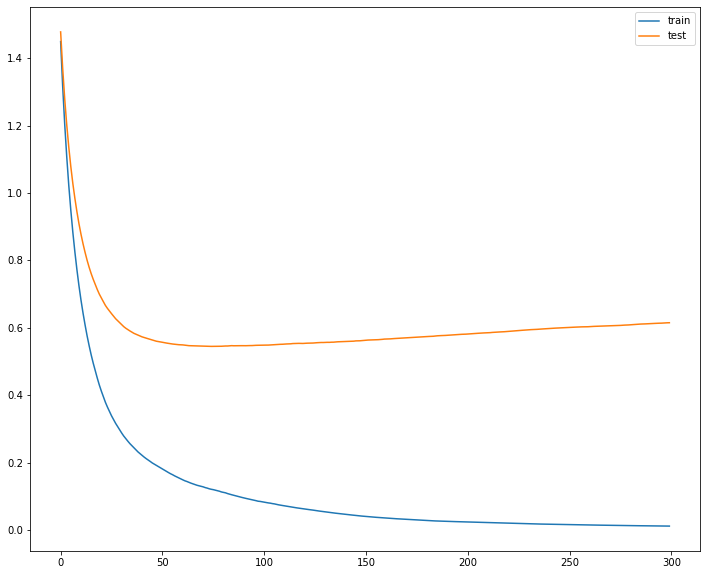

In [54]:
results = xgb_clf.evals_result()
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

MODELS VALIDATION

In [24]:
##decision tree
y_pred_dt = clf.predict(x_test)
y_train_pred_dt = clf.predict(x_train)
y_val_pred_dt = clf.predict(x_val)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Accuracy_train:",metrics.accuracy_score(y_train, y_train_pred_dt))
print("Accuracy_val:",metrics.accuracy_score(y_val, y_val_pred_dt))

Accuracy: 0.7202181208053692
Accuracy_train: 0.7864269662921348
Accuracy_val: 0.7223154362416108


In [25]:
##decision tree importances
importance = list(clf.feature_importances_)
features = list(x.columns)

zip_iterator = zip(features, importance)
importances = dict(zip_iterator)
sorted_imp = sorted(importances.items(), key=operator.itemgetter(1),reverse=True)
sorted_imp

[('TRB%', 0.33107659605958595),
 ('height', 0.2606021018161519),
 ('AST%', 0.19734963383716544),
 ('weight', 0.0559078933424614),
 ('USG%', 0.03763062745191712),
 ('3PAr', 0.031566100654225326),
 ('BLK%', 0.027374378914693815),
 ('Year', 0.018364005234755763),
 ('TOV%', 0.010047440944340076),
 ('FTr', 0.009088409116415877),
 ('2P%', 0.006462203131482226),
 ('FT%', 0.0060057267807280415),
 ('STL%', 0.0059317538459163575),
 ('3P%', 0.0025931288701606307)]

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.728658 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.728658 to fit



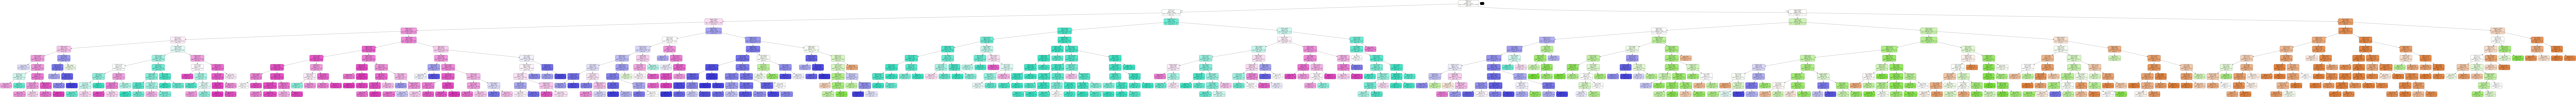

In [26]:
##Decision Tree visualization
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = list(x.columns),class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_visualization.png')
Image(graph.create_png())

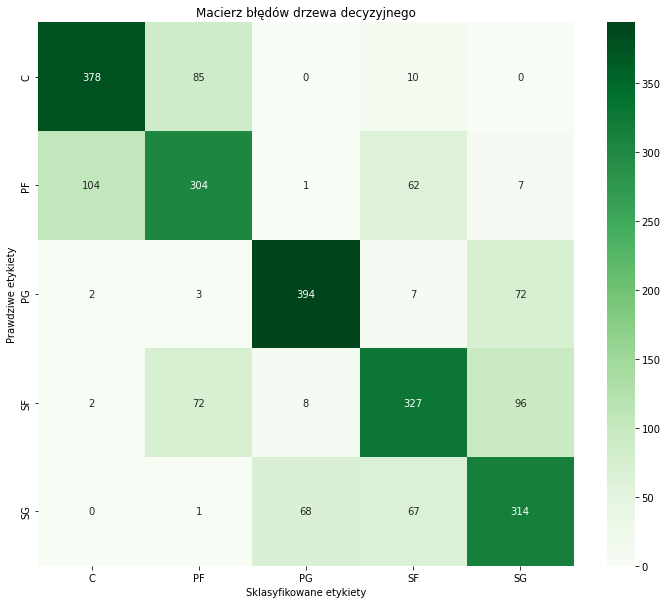

In [27]:
##Decision Tree confusion matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)
ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
ax.set_title('Confusion matrix Decision Tree'); 
ax.xaxis.set_ticklabels(clf.classes_); ax.yaxis.set_ticklabels(clf.classes_);

In [30]:
##Random Forest
y_pred_rnd = rnd_clf.predict(x_test)
y_train_pred_rnd = rnd_clf.predict(x_train)
y_val_pred_rnd = rnd_clf.predict(x_val)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rnd))
print("Accuracy_train:",metrics.accuracy_score(y_train, y_train_pred_rnd))
print("Accuracy_val:",metrics.accuracy_score(y_val, y_val_pred_rnd))

Accuracy: 0.7927852348993288
Accuracy_train: 1.0
Accuracy_val: 0.8057885906040269


In [31]:

importance = list(rnd_clf.feature_importances_)
features = list(x.columns)

zip_iterator = zip(features, importance)
importances = dict(zip_iterator)
sorted_imp = sorted(importances.items(), key=operator.itemgetter(1),reverse=True)
sorted_imp

[('TRB%', 0.19894169464247263),
 ('height', 0.1982508423126774),
 ('AST%', 0.14559498652991967),
 ('weight', 0.07602565172535988),
 ('USG%', 0.04915010013021388),
 ('BLK%', 0.04725656218788095),
 ('3PAr', 0.04619382015598994),
 ('TOV%', 0.037588542439129236),
 ('Year', 0.03747120382464285),
 ('2P%', 0.03543955080881804),
 ('FT%', 0.035203338905581964),
 ('FTr', 0.03495140323202337),
 ('STL%', 0.03151360325325524),
 ('3P%', 0.02641869985203494)]

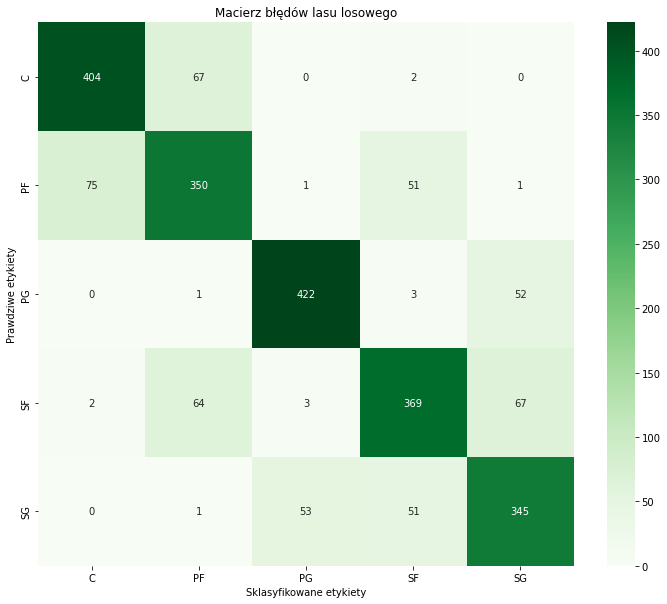

In [33]:
##Random forest confusion matrix

cm_rnd = confusion_matrix(y_test, y_pred_rnd)
ax= plt.subplot()
sns.heatmap(cm_rnd, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Real albels'); 
ax.set_title('Confusion matrix Random Forest'); 
ax.xaxis.set_ticklabels(rnd_clf.classes_); ax.yaxis.set_ticklabels(rnd_clf.classes_);

In [55]:
##xgboost
y_pred_xgb = xgb_clf.predict(x_test)
y_train_pred_xgb = xgb_clf.predict(x_train)
y_val_pred_xgb = clf.predict(x_val)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Accuracy_train:",metrics.accuracy_score(y_train, y_train_pred_xgb))
print("Accuracy_val:",metrics.accuracy_score(y_val, y_val_pred_xgb))


Accuracy: 0.7969798657718121
Accuracy_train: 1.0
Accuracy_val: 0.7223154362416108


In [56]:
importance = list(xgb_clf.feature_importances_)
features = list(x.columns)

zip_iterator = zip(features, importance)
importances = dict(zip_iterator)
sorted_imp = sorted(importances.items(), key=operator.itemgetter(1),reverse=True)
sorted_imp

[('height', 0.32842416),
 ('TRB%', 0.17482185),
 ('AST%', 0.15090366),
 ('weight', 0.05446101),
 ('3PAr', 0.043191087),
 ('BLK%', 0.035862003),
 ('USG%', 0.034752958),
 ('Year', 0.031211538),
 ('STL%', 0.028688151),
 ('TOV%', 0.024739075),
 ('FTr', 0.024034625),
 ('2P%', 0.02382866),
 ('3P%', 0.022877654),
 ('FT%', 0.022203524)]

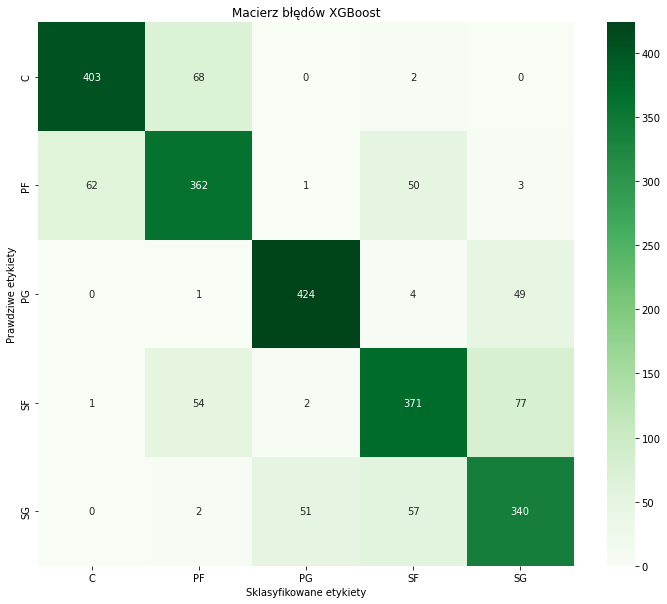

In [57]:
##Xgboost confusion matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='g', ax=ax,cmap='Greens')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
ax.set_title('Confusion matrix XGBoost'); 
ax.xaxis.set_ticklabels(xgb_clf.classes_); ax.yaxis.set_ticklabels(xgb_clf.classes_);

BEST MODEL : RANDOM FOREST : VAL_ACC = 0.8058

In [61]:
#FEATURE IMPORTANCES
importance = list(rnd_clf.feature_importances_)
features = list(x.columns)

zip_iterator = zip(features, importance)
importances = dict(zip_iterator)
sorted_imp = sorted(importances.items(), key=operator.itemgetter(1),reverse=True)
sorted_imp

[('TRB%', 0.19894169464247263),
 ('height', 0.1982508423126774),
 ('AST%', 0.14559498652991967),
 ('weight', 0.07602565172535988),
 ('USG%', 0.04915010013021388),
 ('BLK%', 0.04725656218788095),
 ('3PAr', 0.04619382015598994),
 ('TOV%', 0.037588542439129236),
 ('Year', 0.03747120382464285),
 ('2P%', 0.03543955080881804),
 ('FT%', 0.035203338905581964),
 ('FTr', 0.03495140323202337),
 ('STL%', 0.03151360325325524),
 ('3P%', 0.02641869985203494)]

In [62]:
importances_df=pd.DataFrame(sorted_imp,columns=['Feature','Importance'])
importances_df

Feature  Importance
0     TRB%    0.198942
1   height    0.198251
2     AST%    0.145595
3   weight    0.076026
4     USG%    0.049150
5     BLK%    0.047257
6     3PAr    0.046194
7     TOV%    0.037589
8     Year    0.037471
9      2P%    0.035440
10     FT%    0.035203
11     FTr    0.034951
12    STL%    0.031514
13     3P%    0.026419

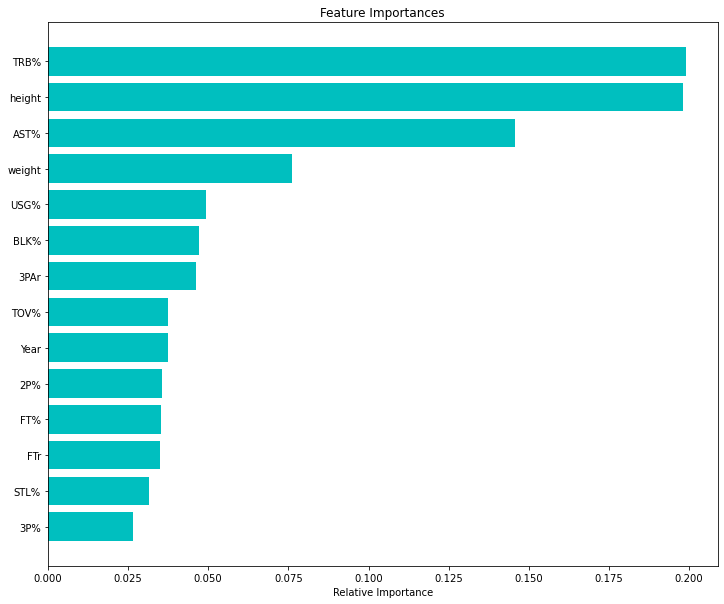

In [70]:
features = importances_df['Feature']
importances = importances_df['Importance']
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Parameters that best distinguish individual basketball positions : 
1.TRB% - Total rebounds percentage.
2.height.
3.AST% - Assists Percentage.